In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
#--------
# consts

crnsLon, crnsLat = -109.955567, 47.059422

In [2]:
snodas_j15 = xr.open_dataset('../data/snodas/snodas_2021-0115.nc')
snodas_j21 = xr.open_dataset('../data/snodas/snodas_2021-0121.nc')
snodas_j22 = xr.open_dataset('../data/snodas/snodas_2021-0122.nc')
snodas_j29 = xr.open_dataset('../data/snodas/snodas_2021-0129.nc')
snodas_f17 = xr.open_dataset('../data/snodas/snodas_2021-0217.nc')
snodas_f18 = xr.open_dataset('../data/snodas/snodas_2021-0218.nc')
snodas_f24 = xr.open_dataset('../data/snodas/snodas_2021-0224.nc')
snodas_m04 = xr.open_dataset('../data/snodas/snodas_2021-0304.nc')

In [3]:
snodas_sd_j15 = xr.open_dataset('../data/snodas/snodas_sd_2021-0115.nc')
snodas_sd_j21 = xr.open_dataset('../data/snodas/snodas_sd_2021-0121.nc')
snodas_sd_j22 = xr.open_dataset('../data/snodas/snodas_sd_2021-0122.nc')
snodas_sd_j29 = xr.open_dataset('../data/snodas/snodas_sd_2021-0129.nc')
snodas_sd_f17 = xr.open_dataset('../data/snodas/snodas_sd_2021-0217.nc')
snodas_sd_f18 = xr.open_dataset('../data/snodas/snodas_sd_2021-0218.nc')
snodas_sd_f24 = xr.open_dataset('../data/snodas/snodas_sd_2021-0224.nc')
snodas_sd_m04 = xr.open_dataset('../data/snodas/snodas_sd_2021-0304.nc')

In [4]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(snodas_f17.lat-crnsLat)
abslon = np.abs(snodas_f17.lon-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))
# Now I can use that index location to get the values at the x/y diminsion

carc_snodas_j15 = snodas_j15.isel(lon=xloc, lat=yloc)
carc_snodas_j21 = snodas_j21.isel(lon=xloc, lat=yloc)
carc_snodas_j22 = snodas_j22.isel(lon=xloc, lat=yloc)
carc_snodas_j29 = snodas_j29.isel(lon=xloc, lat=yloc)
carc_snodas_f17 = snodas_f17.isel(lon=xloc, lat=yloc)
carc_snodas_f18 = snodas_f18.isel(lon=xloc, lat=yloc)
carc_snodas_f24 = snodas_f24.isel(lon=xloc, lat=yloc)
carc_snodas_m04 = snodas_m04.isel(lon=xloc, lat=yloc)

carc_snodas_sd_j15 = snodas_sd_j15.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j21 = snodas_sd_j21.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j22 = snodas_sd_j22.isel(lon=xloc, lat=yloc)
carc_snodas_sd_j29 = snodas_sd_j29.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f17 = snodas_sd_f17.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f18 = snodas_sd_f18.isel(lon=xloc, lat=yloc)
carc_snodas_sd_f24 = snodas_sd_f24.isel(lon=xloc, lat=yloc)
carc_snodas_sd_m04 = snodas_sd_m04.isel(lon=xloc, lat=yloc)

In [5]:
ucla_swe = xr.open_dataset('../data/wus_ucla_sr/WUS_UCLA_SR_v01_N47_0W110_0_agg_16_WY2020_21_SWE_SCA_POST.nc')
ucla_depth = xr.open_dataset('../data/wus_ucla_sr/WUS_UCLA_SR_v01_N47_0W110_0_agg_16_WY2020_21_SD_POST.nc')

In [6]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ucla_swe.Latitude-crnsLat)
abslon = np.abs(ucla_swe.Longitude-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))


# Now I can use that index location to get the values at the x/y diminsion
carc_wus = ucla_swe.isel(Longitude=slice(xloc, xloc+2), Latitude=slice(yloc-1,yloc+1))

In [7]:
carc_depths = ucla_depth.isel(Longitude=slice(xloc, xloc+2), Latitude=slice(yloc-1,yloc+1))

In [8]:
ua_4km_swe = xr.open_dataset('../data/ua_4km_swe/4km_SWE_Depth_WY2021_v01.nc')

In [9]:
# 112 - j21
# 113 - j22
# 120 - j29
# 139 - f17
# 140 - f18
# 146 - f24
# 154 - m04

In [10]:
# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ua_4km_swe.lat-crnsLat)
abslon = np.abs(ua_4km_swe.lon-crnsLon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))
# Now I can use that index location to get the values at the x/y diminsion
carc_u4k = ua_4km_swe.isel(lon=xloc, lat=yloc)

In [11]:
sd1 = carc_depths.mean(dim=["Longitude", "Latitude"]).isel(Stats=0).to_pandas()
sd2 = carc_u4k.DEPTH.to_pandas()

In [12]:
sd2 = sd2.reset_index()
sd2.index.name = 'Day'

In [13]:
sd2.columns = ['Time', 'SD UA [mm]']

In [14]:
sds = sd2.join(sd1)

In [15]:
sds['SD UA [m]'] = sds['SD UA [mm]']/1000

In [16]:
sds = sds.reset_index()
sds = sds.set_index('Time')

In [17]:
sds['SD UA [cm]'] = sds['SD UA [mm]']/10
sds['SD_Post [cm]'] = sds['SD_Post']*100

In [18]:
# w_sds = pd.read_csv('../w_sd.csv')

In [19]:
# w_sds = w_sds.drop(['Unnamed: 0'], axis=1)

In [20]:
# w_sds = w_sds*100
# w_sds.melt()

In [21]:
years = np.repeat(2021, 8)
months = np.array([1,1,1,1,2,2,2,3])
days = np.array([15, 21, 22, 29, 17, 18, 24, 4])

all_dates = [dt.datetime(years[i], months[i], days[i]) for i in range(8)]
dates_no_j15 = all_dates[1:]

In [22]:
uw_sd = pd.DataFrame(
    {'Date': all_dates,
     'carc_dowy':[106, 112, 113, 120, 139, 140, 146, 154],
     'sd [m]':[0.0009416359999999998,0.016401694000000005,0.0197357636,0.008898735999999999,0.0787415496,0.075809294,0.021657748399999996,0.0130767216],
     'sd std [m]':[0.015382485548294984,
                   0.03805179432261196,
                   0.03727467892557782,
                   0.03188966838840291,
                   0.07599655069929648,
                   0.0763905110765831,
                   0.06071239652428734,
                   0.04000171659561741]})

In [23]:
uw_sd['sd [cm]'] = uw_sd['sd [m]']*100
uw_sd['sd std [cm]'] = uw_sd['sd std [m]']*100

In [24]:
swe1 = carc_wus.mean(dim=["Longitude", "Latitude"]).isel(Stats=0).to_pandas()
swe2 = carc_u4k.SWE.to_pandas()

In [25]:
swe1['SWE ucla [mm]'] = swe1['SWE_Post']*1000

In [26]:
swe2 = swe2.reset_index()
swe2.index.name = 'Day'

In [27]:
swe2.columns = ['time', 'SWE UA [mm]']

In [28]:
swes = swe2.join(swe1)

In [29]:
carc_avg_swe_cm = [0.530504098566071, 0.637230009292796,0.327047373752602,1.09127963950704,1.05802546834056,0.755550068249541,0.572121540796448]
carc_dowy = [112, 113, 120, 139, 140, 146, 154]
carc_dowy2 = [106, 112, 113, 120, 139, 140, 146, 154]

In [30]:
carc_lidar_swe = pd.DataFrame({
    'Date':dates_no_j15,
    'SWE [cm]': carc_avg_swe_cm
})

In [31]:
carc_lidar_swe['SWE [mm]'] = carc_lidar_swe['SWE [cm]']*10

In [32]:
snodas_swe = [int(carc_snodas_j15.Band1.values),
              int(carc_snodas_j21.Band1.values),
              int(carc_snodas_j22.Band1.values),
              int(carc_snodas_j29.Band1.values),
              int(carc_snodas_f17.Band1.values),
              int(carc_snodas_f18.Band1.values),
              int(carc_snodas_f24.Band1.values),
              int(carc_snodas_m04.Band1.values)]

In [33]:
snodas_sd = [int(carc_snodas_sd_j15.Band1.values),
              int(carc_snodas_sd_j21.Band1.values),
              int(carc_snodas_sd_j22.Band1.values),
              int(carc_snodas_sd_j29.Band1.values),
              int(carc_snodas_sd_f17.Band1.values),
              int(carc_snodas_sd_f18.Band1.values),
              int(carc_snodas_sd_f24.Band1.values),
              int(carc_snodas_sd_m04.Band1.values)]

In [34]:
# ncdf_boxplot = pd.read_csv('./data/plotting/ncdf_boxplot.csv')
ncdf_boxplot = pd.read_csv('./data/plotting/revised_swe_fig9.csv', parse_dates=['dates'])
ncdf_boxplot['swe j15 [mm]'] = ncdf_boxplot['swe j15 [cm]']*10
ncdf_boxplot['swe bare [mm]'] = ncdf_boxplot['swe bare [cm]']*10

In [35]:
# ncdf_boxplot.boxplot(column='swe bare [mm]', by='dates', positions=mpl.dates.date2num(all_dates),
#                      zorder=1, patch_artist=True,
#                      grid=False,
#                      boxprops={'facecolor':'grey'},
#                      whiskerprops={'color':'grey'},
#                      flierprops={'marker':'+', 'markersize':5, 'color':'grey'},
#                      medianprops={'color':'white'}, showcaps=False, label='Modeled SWE (This Study)')

In [36]:
# swes_plot = pd.read_csv('./data/plotting/swes_long.csv')
# swes_plot

In [37]:
crns = pd.read_csv('./data/plotting/crns_daily_swe_adjusted.csv', parse_dates=['UTC'])

In [38]:
crns

,UTC,N,swe_ms
0,2020-11-22,4877.227178,0.041495
1,2020-11-23,4984.055284,-0.118404
2,2020-11-24,4870.841159,0.052172
3,2020-11-25,4897.992997,0.010586
4,2020-11-26,4919.156845,-0.020958
...,...,...,...
187,2021-05-28,4647.269402,0.409759
188,2021-05-29,4842.180599,0.096152
189,2021-05-30,4850.783211,0.083744
190,2021-05-31,4898.414221,0.010051


In [39]:
crns['dowy'] = np.abs((pd.to_datetime('2020-10-01') - crns['UTC']).dt.days)

In [40]:
crns['swe [mm]'] = crns['swe_ms']*10

In [41]:
crns_data = crns[crns['UTC'].isin(['2021-01-21',
                       '2021-01-22',
                       '2021-01-29',
                       '2021-02-17',
                       '2021-02-18',
                       '2021-02-24',
                       '2021-03-04'])]

/var/folders/33/s6sv9bl94b5gdyb7kzhmyjlr0000gq/T/ipykernel_62991/428215491.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  crns_data = crns[crns['UTC'].isin(['2021-01-21',


In [42]:
crns_data['SWE [mm]'] = crns_data['swe_ms']*10

/var/folders/33/s6sv9bl94b5gdyb7kzhmyjlr0000gq/T/ipykernel_62991/1581208926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crns_data['SWE [mm]'] = crns_data['swe_ms']*10


In [43]:
# crns_data['dowy'] = [112, 113, 120, 139, 140, 146, 154]

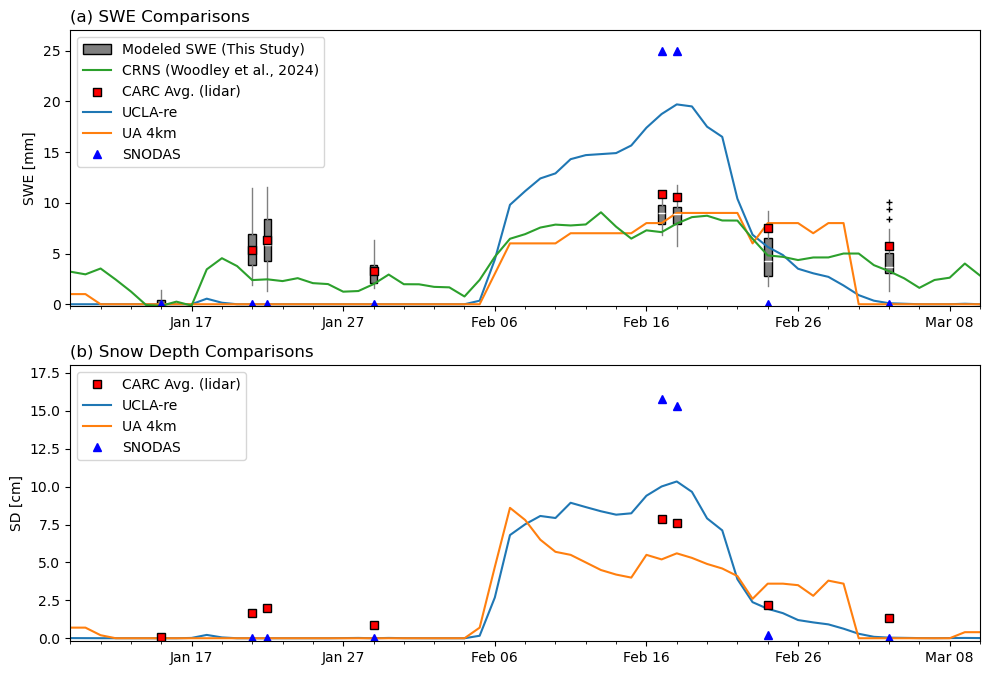

In [44]:
#- Figure 9 code
fig = plt.figure(figsize=(10,7))

gs = fig.add_gridspec(2,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

dr = pd.date_range(start=dt.datetime(2021,1,9),
                   end=dt.datetime(2021,3,10))

ncdf_boxplot.boxplot(ax=ax1, column='swe bare [mm]', by='dates', positions=mpl.dates.date2num(all_dates),
                     zorder=1, patch_artist=True,
                     grid=False,
                     boxprops={'facecolor':'grey'},
                     whiskerprops={'color':'grey'},
                     flierprops={'marker':'+', 'markersize':5, 'color':'grey'},
                     medianprops={'color':'white'}, showcaps=False, label='Modeled SWE (This Study)')
crns.plot(ax=ax1, x='UTC', y='swe [mm]', color='tab:green', label='CRNS (Woodley et al., 2024)')
carc_lidar_swe.plot.scatter(ax=ax1, x='Date', y='SWE [mm]', marker='s',
                            s=30, color='red', zorder=2, edgecolor='k', label='CARC Avg. (lidar)')
swes.plot(ax=ax1, x='time', y='SWE ucla [mm]', zorder=1, label='UCLA-re', color='tab:blue')
swes.plot(ax=ax1, x='time', y='SWE UA [mm]', zorder=1, label='UA 4km', color='tab:orange')
ax1.plot(all_dates, snodas_swe, 'b^', label='SNODAS')
ax1.axis([dt.datetime(2021,1,9),dt.datetime(2021,3,10),-0.2,27])
ax1.legend(loc='upper left')

ax1.set_title('')
ax1.set_title('(a) SWE Comparisons', loc='left')
fig.suptitle('')
ax2.plot(uw_sd['Date'], uw_sd['sd [cm]'], 'rs', markeredgecolor='k', markersize=6, label='CARC Avg. (lidar)', zorder=4)
sds.plot(ax=ax2, y='SD_Post [cm]', zorder=2, label='UCLA-re', color='tab:blue')
sds.plot(ax=ax2, y='SD UA [cm]', zorder=2, label='UA 4km', color='tab:orange')
ax2.plot(all_dates, [x/10 for x in snodas_sd], 'b^', label='SNODAS')

ax2.axis([dt.datetime(2021,1,9),dt.datetime(2021,3,10),-0.2,18])
ax2.set_xticks(mpl.dates.date2num(dr), dr, rotation=0, ha='center')
# ax2.grid(False)
ax2.legend(loc='upper left')
# ax2.set_xlabel('D')
ax2.set_ylabel('SD [cm]')
ax2.set_title('(b) Snow Depth Comparisons', loc='left')
fig.suptitle('')

locator1 = mdates.DayLocator(interval=2)
locator2 = mdates.DayLocator(interval=10)
formatter2 = mdates.DateFormatter("%b %d")
blank_format = mdates.DateFormatter("")

ax1.set_xticks(mpl.dates.date2num(dr), dr, rotation=0, ha='center')
ax1.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_locator(locator2)
ax1.xaxis.set_minor_locator(locator1)
ax2.xaxis.set_minor_locator(locator1)

ax1.xaxis.set_major_formatter(formatter2)
ax2.xaxis.set_major_formatter(formatter2)
ax1.xaxis.set_minor_formatter(blank_format)
ax2.xaxis.set_minor_formatter(blank_format)

ax1.set_xlabel('')
ax2.set_xlabel('')

plt.tight_layout()
# plt.savefig('../figs/to_publish/f08.png', bbox_inches='tight', facecolor='w', dpi=300)
# plt.savefig('../figs/to_publish/f08.pdf', bbox_inches='tight', facecolor='w', dpi=300)